# Image recognition scenario

Under this scenario, a person is identified in an image.

In [1]:
# Added so that I can refer to common in the parent folder
from pathlib import Path
import sys
path = str(Path(Path('.').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

# Import the common module
import common
import os
from PIL import Image
import requests
from io import BytesIO

In [2]:
# Get a configured model
client = common.get_openai_client(
        api_key=common.api_KEY,
        api_version=common.api_version,
        azure_endpoint=common.api_URI)

In [3]:
def call_openai(url:str,prompt:str,max_tokens=1000,temperature=0.2):
    response = client.chat.completions.create(
            model=common.gpt_api_deployment,
            messages=[
                {
                "role": "system",
                "content": "You are a helpful assistant that can help provide a compute recommendation based on the provided information. Use only the provided information."
                },
                {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                        "detail": "high"
                    },
                    },
                ],
                }
            ],
            max_tokens=max_tokens,
            temperature=temperature
        )
    return str(response.choices[0].message.content)

In [4]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width//2, img.height//2))
    return img


In [5]:
url = "https://alemoraoaist.z13.web.core.windows.net/images/faces.png"


In [6]:
def full_process(url, question):
    print("Image:")
    get_image(url).show()
    print("User:")
    common.split_sentence(question)
    print("\nAssistant:")
    ans = call_openai(url,question)
    common.split_sentence(ans)

Image:


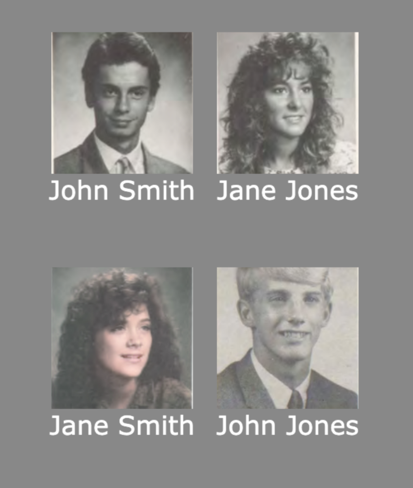

User:
Describe what is in the image.

Assistant:
The image shows two sets of names, "John Smith" and "Jane Jones" on the top, and "Jane Smith" and "John Jones" on the
bottom. Each name is associated with a portrait-style photograph.


In [7]:
question = "Describe what is in the image."
full_process(url, question)

Image:


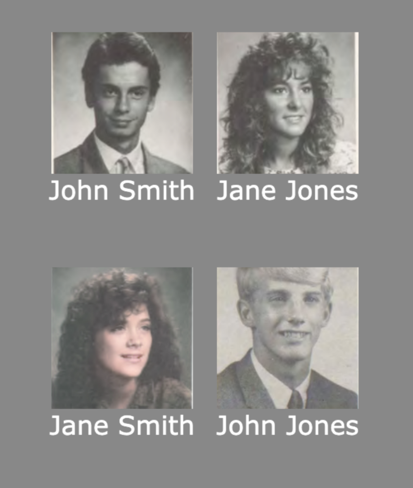

User:
Who is Jane Smith.

Assistant:
Based on the provided image, Jane Smith is the name labeled on the bottom left portrait of a person with curly hair.


In [16]:
question = "Who is Jane Smith."
full_process(url, question)